In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
df.iloc[:20].style.background_gradient(cmap="viridis")

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [20]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.corr(numeric_only=True)

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<Axes: >

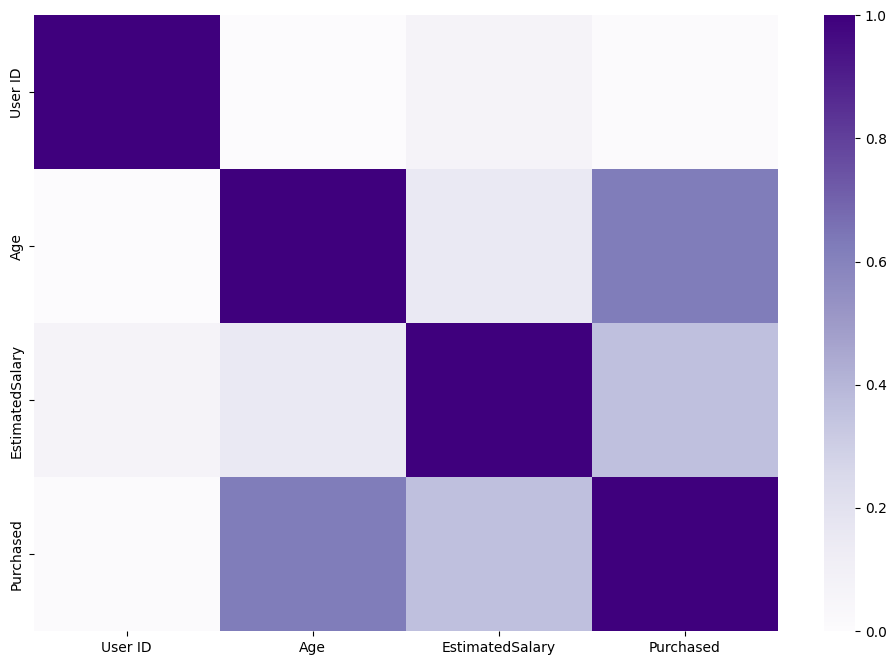

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),cmap="Purples")

/tmp/ipykernel_14299/4105514333.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Purchased",data=df,palette="Purples"    )


<Axes: xlabel='Purchased', ylabel='count'>

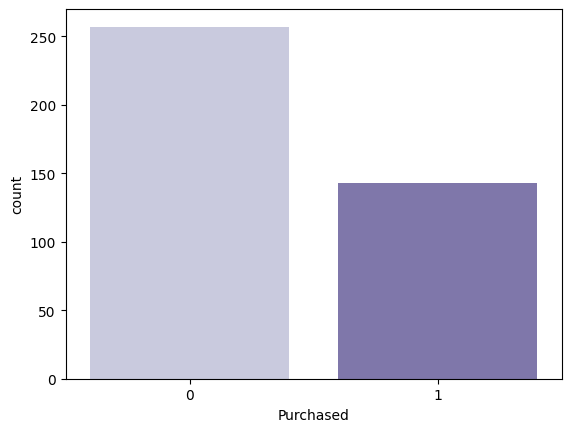

In [26]:
sns.countplot(x="Purchased",data=df,palette="Purples"    )

In [27]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [30]:
map_gender={
    "Male":1,
    "Female":0
}

In [31]:
df["Gender"]=df["Gender"].map(map_gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [32]:
df[["Gender","Purchased"]].value_counts()

Gender  Purchased
1       0            130
0       0            127
        1             77
1       1             66
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

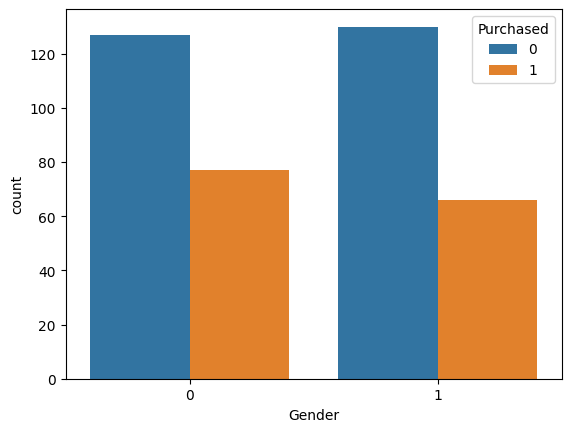

In [33]:
sns.countplot(x="Gender",data=df,hue="Purchased")

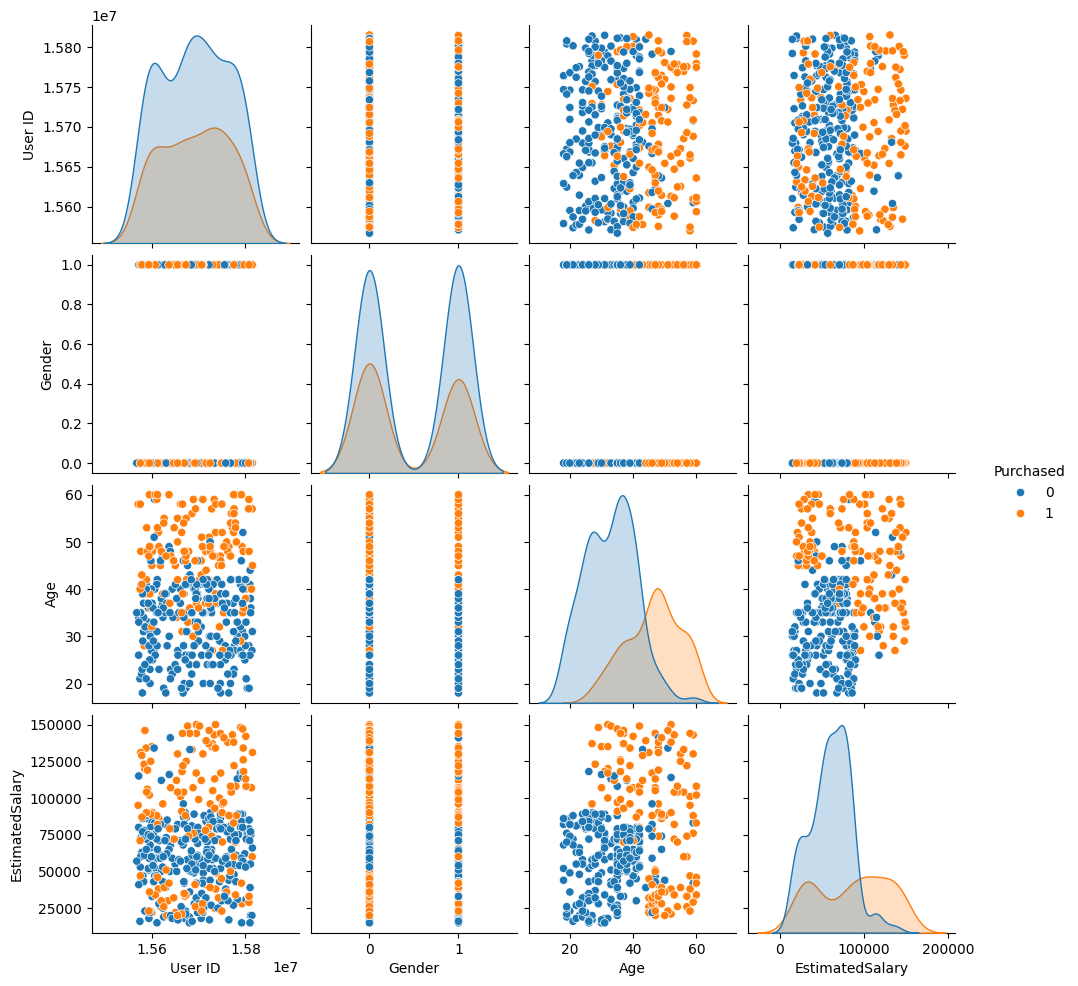

In [34]:
sns.pairplot(df,hue="Purchased")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

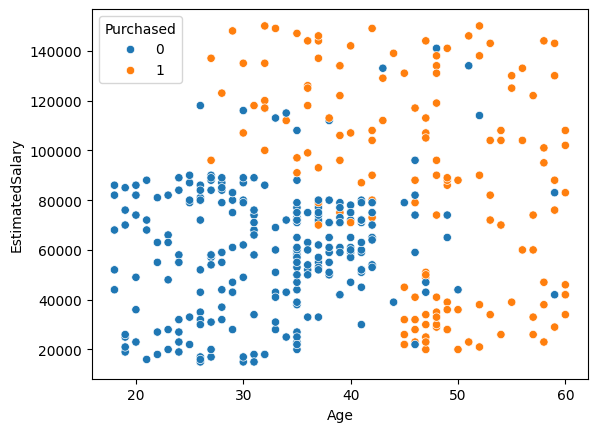

In [35]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")

## Train Test SPlit

In [ ]:
X=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=9)
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [65]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn=KNeighborsClassifier(n_neighbors=3) 
# 3 tane komşuya bakarak veriyi analiz edecek.

In [68]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
pred=knn.predict(scaled_X_test)

## Model Değerlendirme

In [71]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

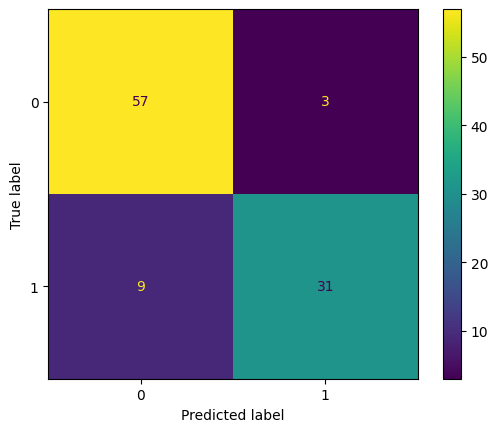

In [72]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test,pred)) 
#Başarı oranlarını yazdırdık (fit-score)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        60
           1       0.91      0.78      0.84        40

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100



In [ ]:
hasta_oran=[]

In [77]:
for k in range(1,48):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train,y_train)
    pred_elbow=knn.predict(scaled_X_test)

    err=1-accuracy_score(y_test,pred_elbow)
    hasta_oran.append(err)

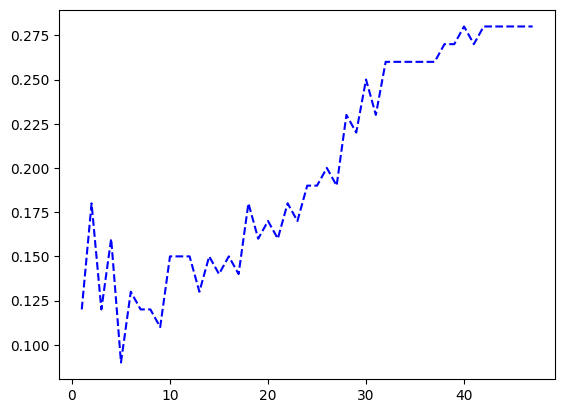

In [83]:
plt.plot(range(1, 48), hasta_oran, color="blue", linestyle="dashed")


In [84]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(scaled_X_train,y_train)
pred_elbow=knn.predict(scaled_X_test)

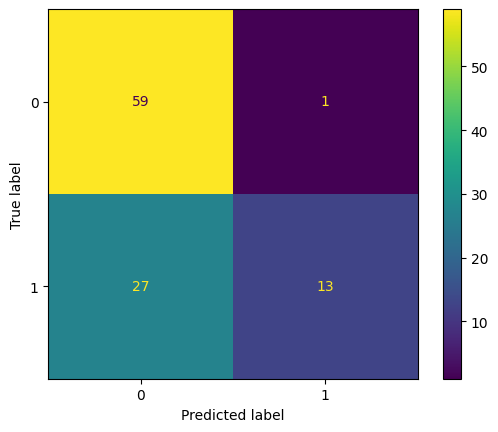

In [85]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

In [86]:
# daha az hata yapıldı.

In [87]:
print(classification_report,(y_test,pred))

<function classification_report at 0x7295625ea0c0> (57     0
32     0
17     1
167    0
2      0
      ..
379    1
252    1
320    1
351    0
244    0
Name: Purchased, Length: 100, dtype: int64, array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]))
